In [1]:
###########################################################################################################
#Classification of mnist dataset using classical algorithms
###########################################################################################################

#importing the required libraries
from keras.datasets import mnist
import matplotlib.pyplot as plt

from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [2]:
#splitting into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#one-hot encode target column
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [3]:
#Reshaping
x_train_rf=x_train.reshape(60000,784)
x_test_rf=x_test.reshape(10000,784)

In [4]:
#Classification report of random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf2=RandomForestClassifier()
clf2.fit(x_train_rf,y_cat_train)


RandomForestClassifier()

In [5]:
from sklearn.metrics import classification_report
print("Random Forest:")
y_pred2=clf2.predict(x_test_rf)
print(classification_report(y_cat_test,y_pred2))

Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       1.00      0.98      0.99      1135
           2       0.99      0.89      0.94      1032
           3       1.00      0.87      0.93      1010
           4       0.99      0.89      0.94       982
           5       1.00      0.86      0.92       892
           6       1.00      0.93      0.96       958
           7       0.99      0.91      0.95      1028
           8       0.99      0.84      0.91       974
           9       0.99      0.88      0.93      1009

   micro avg       0.99      0.90      0.95     10000
   macro avg       0.99      0.90      0.95     10000
weighted avg       0.99      0.90      0.95     10000
 samples avg       0.90      0.90      0.90     10000



D:\Downloads\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
#As you can see above our random forest is giving us a precision between 99% and 100% for all the classes

In [8]:
#creating CNN model
model = Sequential()
#adding model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compiling model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#training the model
model.fit(x_train, y_cat_train, validation_data=(x_test, y_cat_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2531s 1s/step - loss: 0.2163 - accuracy: 0.9525 - val_loss: 0.1024 - val_accuracy: 0.9704
Epoch 2/3
1875/1875 [==============================] - 11384s 6s/step - loss: 0.0635 - accuracy: 0.9806 - val_loss: 0.0734 - val_accuracy: 0.9757
Epoch 3/3
1875/1875 [==============================] - 4283s 2s/step - loss: 0.0441 - accuracy: 0.9863 - val_loss: 0.0839 - val_accuracy: 0.9785


#As you can see our CNN model is giving us a accuracy of 98.63% after 3 epochs

In [9]:
#testing a brand new single image
from skimage.io import imread
import skimage
import numpy as np
url=input("Enter the path of the image you want to try:")
img=imread(url)
img_rf=skimage.transform.resize(img,output_shape=(28,28))
img_rf=img_rf.reshape(1,784)

Enter the path of the image you want to try:D:\Downloads\images.png


Predicted output: 7


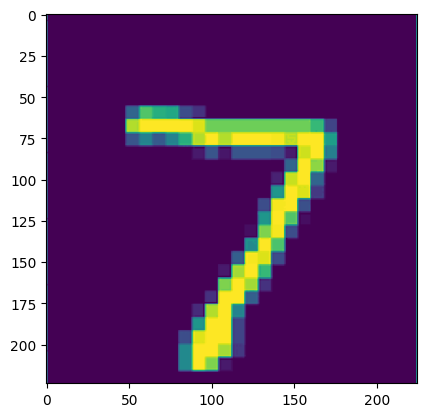

In [10]:
arr=clf2.predict(img_rf)
arr.shape
for i in range (0,10):
    if arr[0][i]==1:
        print("Predicted output:",i)
        break;
plt.imshow(img)